In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
np.set_printoptions(precision=2)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Lobster-Regular.'

import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [2]:
lobster_csv = pd.read_csv('lobsterdata.csv')
CPI_csv = pd.read_csv('ConsumerPriceIndex.csv')
# I split this up before hand but it was just a column that has every row with lobster
lobster_csv.drop('Species',axis=1,inplace=True)
# No real need for pounds and tons, can just convert later.
lobster_csv.drop('Metric Tons',axis=1,inplace=True)

### Handel CPI

In [3]:
CPI_csv.DATE = pd.to_datetime(CPI_csv.DATE)
CPI_csv.index = pd.DatetimeIndex(CPI_csv.DATE)
CPI_date_df = pd.DataFrame(CPI_csv['CPIAUCSL'])
CPI_yr_mean = CPI_date_df.groupby(CPI_date_df.index.year).mean()
CPI_yr_mean.drop(CPI_yr_mean.index[[0,-1,-2]],inplace=True)

### Handel Lobsters

In [4]:
no_type = lobster_csv[['Year','Pounds','USD']].copy()
lob_year = no_type.groupby(['Year']).mean()
lob_year['PerPound'] = lob_year['USD']/lob_year['Pounds']
perpound_mean = lob_year['PerPound'].mean()

### Vars to plot

In [5]:
pp_inflation = lob_year.iloc[-1,2]/ lob_year.iloc[0,2]
lob_year_log = lob_year.pct_change(periods=3)
avg_change = lob_year.pct_change().mean()
xmin = lob_year.index.min()+3
xmax = lob_year.index.max()
pp_norm = lob_year['PerPound'] / lob_year['PerPound'].iloc[0]
CPI_norm = CPI_yr_mean/ CPI_yr_mean.iloc[0]

### King Krabz

In [6]:
lob_type_df = lobster_csv.groupby(['Type','Year']).mean()
spec_cleaned_df = lob_type_df.reset_index()
spec_cleaned_df = spec_cleaned_df.set_index('Year',drop=True)
spec_cleaned_df['PerPound'] = spec_cleaned_df['USD']/spec_cleaned_df['Pounds']
spec_cleaned_df.drop(['Pounds','USD'],axis=1,inplace=True)
lob_grop = spec_cleaned_df.groupby(['Type','Year']).mean()
unstuck = lob_grop.unstack(level=-1).T
xd = unstuck.reset_index()
xd.drop('level_0',axis=1,inplace=True)
lol = xd.set_index('Year')
cali_norm = lol['CALIFORNIA SPINY'] / lol['CALIFORNIA SPINY'].iloc[0]

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


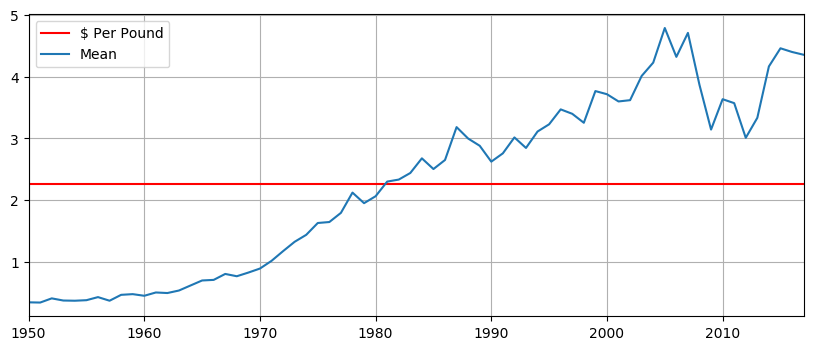

In [7]:
fig,ax = plt.subplots()

ax.axes.axhline(y=perpound_mean,color='red')

per_pound = ax.plot( lob_year.index, lob_year['PerPound'])

plt.xlim(lob_year.index.min(),lob_year.index.max())
plt.grid(True)
plt.legend(['$ Per Pound','Mean'])

fig.set_size_inches(10, 4)
fig.set_dpi(100)
plt.savefig('images/price_per_pound_change_art')
plt.show();

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Lobster'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


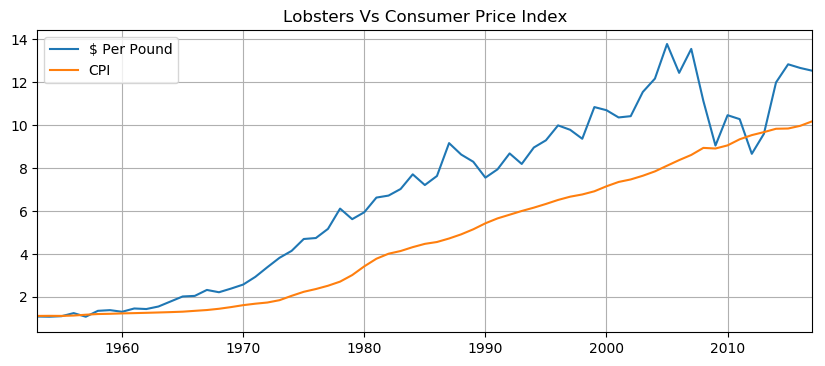

In [8]:
fig,ax = plt.subplots()

per_pound = ax.plot( lob_year_log.index, pp_norm)

CPI = ax.plot( lob_year_log.index, CPI_norm)


plt.xlim(xmin,xmax)
plt.grid(True)
plt.legend(['$ Per Pound','CPI'])
plt.title('Lobsters Vs Consumer Price Index',fontname='Lobster')

fig.set_size_inches(10, 4)
fig.set_dpi(100)
plt.savefig('images/NormCPIvLob')
plt.show();

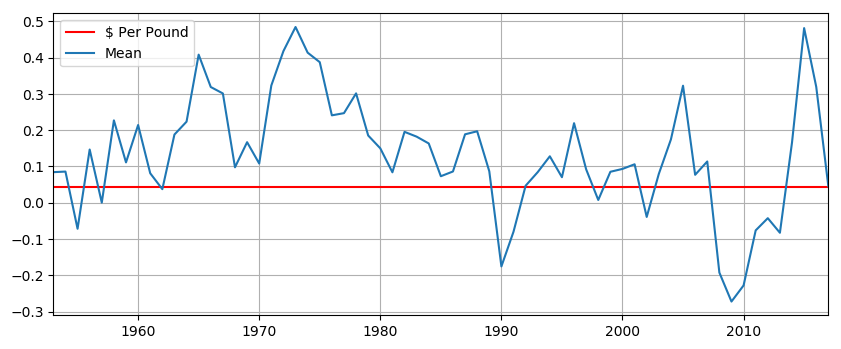

In [9]:

fig,ax = plt.subplots()

ax.axes.axhline(y=avg_change[2],color='red')

per_pound = ax.plot( lob_year_log.index, lob_year_log['PerPound'])

# CPI_change

plt.xlim(xmin,xmax)
plt.grid(True)
plt.legend(['$ Per Pound','Mean'])

fig.set_size_inches(10, 4)
fig.set_dpi(100)
plt.savefig('images/pctchange daily')
plt.show();

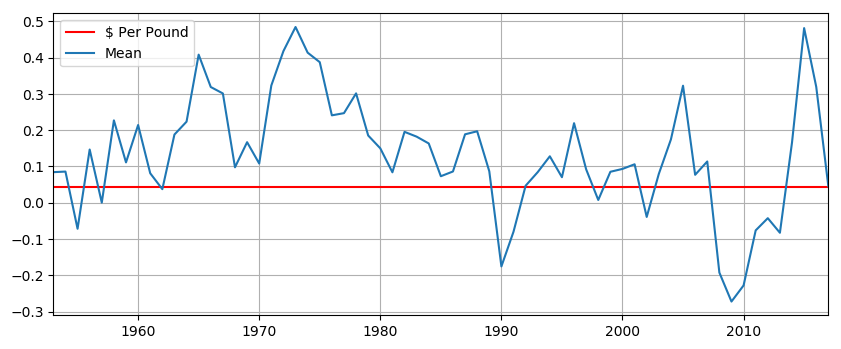

In [10]:
fig,ax = plt.subplots()

ax.axes.axhline(y=avg_change[2],color='red')

per_pound = ax.plot( lob_year_log.index, lob_year_log['PerPound'])

# CPI_change

plt.xlim(xmin,xmax)
plt.grid(True)
plt.legend(['$ Per Pound','Mean'])

fig.set_size_inches(10, 4)
fig.set_dpi(100)
plt.savefig('images/log_change_r3')
plt.show();

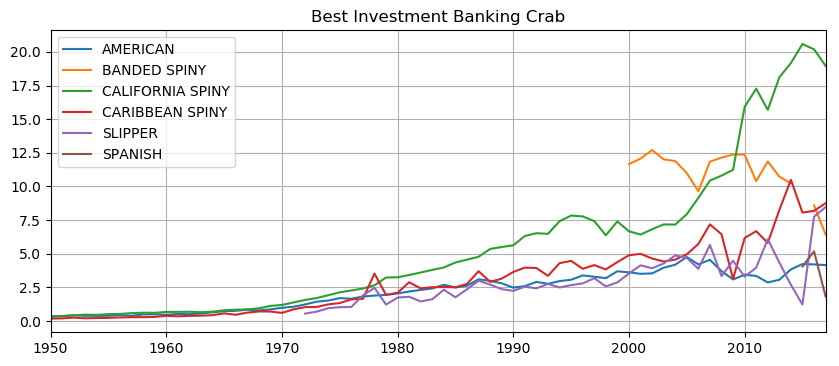

In [11]:
fig,ax = plt.subplots()

# ax.axes.axhline(y=perpound_mean,color='red')

MERICA = ax.plot(lol.index, lol['AMERICAN'])

bran_spiny = ax.plot(lol.index, lol['BANDED SPINY'])

cali = ax.plot(lol.index, lol['CALIFORNIA SPINY'])

caribbean = ax.plot(lol.index, lol['CARIBBEAN SPINY'])

slipper = ax.plot(lol.index, lol['SLIPPER'])

spanish = ax.plot(lol.index, lol['SPANISH'])



plt.xlim(lob_year.index.min(),lob_year.index.max())
plt.grid(True)
plt.legend()
plt.title('Best Investment Banking Crab')

fig.set_size_inches(10, 4)
fig.set_dpi(100)
plt.savefig('images/BestCrabs')
plt.show();

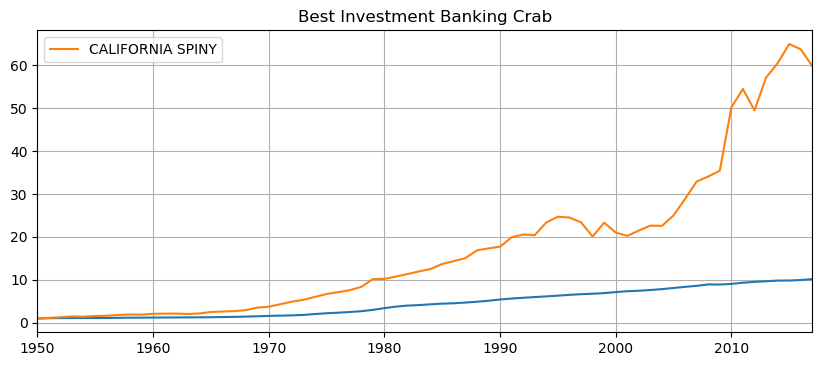

In [12]:
fig,ax = plt.subplots()

# ax.axes.axhline(y=perpound_mean,color='red')

CPI = ax.plot( lob_year_log.index, CPI_norm)

MERICA = ax.plot(lol.index, cali_norm)




plt.xlim(lob_year.index.min(),lob_year.index.max())
plt.grid(True)
plt.legend()
plt.title('Best Investment Banking Crab')

fig.set_size_inches(10, 4)
fig.set_dpi(100)
plt.savefig('images/BestCrabVsCPI')
plt.show();

In [13]:
cali_norm.iloc[-1]

59.781726229551076